In [1]:
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
from matplotlib.patches import ArrowStyle, Rectangle

In [2]:
model_name = ['OPT-1.3B', 'Llama-2-7B', 'Llama-2-13B']
model_name_dict = {
    "OPT-1.3B": "opt_1_point_3", 
    "Phi-2B": "phi_2",
    "Llama-2-7B": "llama_2_7", 
    "Llama-2-13B": "llama_2_13", 
}

In [3]:
model_config_list = np.zeros((6, len(model_name)))
base_path = './model_value_config'
for idx, name in enumerate(model_name):
    file_path = f'{base_path}/{model_name_dict[name]}.pickle'
    with open(file_path, 'rb') as f:
        model_config = pickle.load(f)
        
    tensor_outlier   = np.mean( list(model_config['tensor_outlier_config'].values())  )
    channel_outlier  = np.mean( list(model_config['channel_outlier_config'].values()) )
    group_outlier    = np.mean( list(model_config['group_outlier_config'].values())   )
    tensor_range     = np.mean( list(model_config['tensor_range_config'].values())    )
    channel_range    = np.mean( list(model_config['channel_range_config'].values())   )
    group_range      = np.mean( list(model_config['group_range_config'].values())     )
    
    model_config_list[0, idx] = tensor_outlier
    model_config_list[1, idx] = channel_outlier
    model_config_list[2, idx] = group_outlier
    model_config_list[3, idx] = tensor_range
    model_config_list[4, idx] = channel_range
    model_config_list[5, idx] = group_range

model_config_list[0, -1] -= 0.5 

## Normalized Range and Maximum Value

In [4]:
linestyle   = 'solid'
alpha       = 1
tick_size   = 10
label_size  = 11
legend_size = 9.5
title_size  = 10
text_size   = 8

# bar setting
width      = 0.035  # the width of each bar
edgewidth  = 0.8 # the edge width of each bar
hatchwidth = 0.5 # the edge width of each bar
spacing    = 0.14 # spacing between each model bar
distance   = 0.0  # spacing between every two bars of the same model

x          = np.arange(len(model_name))*spacing # the label locations

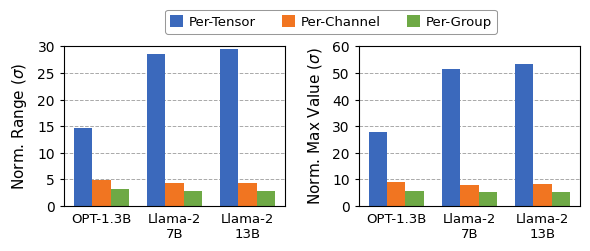

In [33]:
figwidth    = 6
figheight   = 2.3

y_title_pad = 0
title_yloc  = 0.89
rotation = 0
x_margin = 0.08

############# Arrow Style #############
arrowstyle = ArrowStyle.CurveB(head_length=0.4, head_width=0.2, widthA=0.2, widthB=1.0, lengthA=0., lengthB=0., angleA=0, angleB=0, scaleA=None, scaleB=None)
arrowstyle._beginarrow_head = False
arrowstyle._beginarrow_bracket = True
#######################################

f, ax = plt.subplots(1, 2)
f.set_figwidth(figwidth)
f.set_figheight(figheight)
f.tight_layout(pad=1)

f_list = [i for i in range(3)]
color_list = [(58/250, 103/250, 184/250), (236/250, 115/250, 32/250), (108/250, 166/250, 68/250)]
xlabels = ['OPT-1.3B', 'Llama-2\n7B', 'Llama-2\n13B']

arrow_xloc = x + width + distance/2

for i in range(2):
    for j_tmp in range(-1, 2):
        j = j_tmp + 1
        f_list[j] = ax[i].bar(x + j_tmp*width + distance*j_tmp/2, model_config_list[i*3 + j], width, color=color_list[j],)
    
    if i == 0:
        y_low = 0
        y_up  = 30 + 0.1
        y_lim = y_up
        ax[i].set_ylim(y_low, y_lim)
        ax[i].set_yticks(np.arange(y_low, y_up, 5))

        ax[i].set_xticks(x,)
        ax[i].set_xticklabels(xlabels, rotation=rotation)
        ax[i].tick_params(axis='y', which='major', labelsize=tick_size, length=3)
        ax[i].tick_params(axis='x', which='major', labelsize=tick_size-0.5, pad=5, length=0)
        
        ax[i].set_ylabel('Norm. Range ' + r'($\sigma$)', fontsize=label_size, labelpad=6)
    if i == 1:
        y_low = 0
        y_up  = 60 + 0.2
        y_lim = y_up 
        ax[i].set_ylim(y_low, y_lim)
        ax[i].set_yticks(np.arange(y_low, y_up, 10))

        ax[i].set_xticks(x,)
        ax[i].set_xticklabels(xlabels, rotation=rotation)
        ax[i].tick_params(axis='y', which='major', labelsize=tick_size, length=3)
        ax[i].tick_params(axis='x', which='major', labelsize=tick_size-0.5, pad=5, length=0)
        
        ax[i].set_ylabel('Norm. Max Value ' + r'($\sigma$)', fontsize=label_size, labelpad=6)
    
    ax[i].set_axisbelow(True)
    ax[i].grid(True, linestyle='dashed', axis='y', zorder=1000, color='darkgrey', linewidth=0.7)
    
'''
    for j in range(len(model_name)):
        begin_x = arrow_xloc[j]
        begin_y = mem_footprint[i][1][j]
        end_x   = arrow_xloc[j]
        end_y   = mem_footprint[i][0][j] * 1.1
        text_x  = begin_x + 0.01
        text_y  = math.exp((math.log(begin_y) + math.log(end_y)) / 2)
        mem_ratio = round(mem_footprint[i][0][j] / mem_footprint[i][1][j])
        ax[i].annotate(text='', xytext=(begin_x, begin_y), xy=(end_x, end_y), arrowprops=dict(arrowstyle=arrowstyle))
        txt = ax[i].annotate(text=str(mem_ratio) + r'$\times$', xy=(text_x, text_y), fontsize=text_size,
                             bbox=dict(facecolor='white', alpha=1, edgecolor='none', pad=1.5), 
                             horizontalalignment='center', verticalalignment='top')

        ########## Customize text bbox ##########
        bbox = txt.get_window_extent().transformed(ax[i].transData.inverted())
        xmin = bbox.xmin
        xmax = bbox.xmax
        ymin = bbox.ymin
        ymax = bbox.ymax
        dx = xmax-xmin
        dy = ymax-ymin
        extra = 0.2

        # The bounding box vals can be tweaked manually here.
        rect = Rectangle((xmin, ymin-dy*extra), dx, dy*(extra*4 + 1), fc='w', zorder=3)
        ax[i].add_patch(rect)
        ########################################
        txt = ax[i].annotate(text=str(mem_ratio) + r'$\times$', xy=(text_x, text_y), fontsize=text_size,
                             horizontalalignment='center', verticalalignment='top')
'''

leg = f.legend(f_list, ["Per-Tensor", "Per-Channel", "Per-Group"], 
        loc='upper center', bbox_to_anchor=[0.56, 1.1], 
        fontsize=legend_size, ncol=3, columnspacing=2, frameon=True, edgecolor='grey', handlelength=1, handleheight=1, handletextpad=0.4)
leg.get_frame().set_linewidth(0.75)

plt.tight_layout(h_pad=0, w_pad=1.5)
f.savefig('quant_granularity.svg', transparent=True, bbox_inches = 'tight', format='svg', dpi=200, pad_inches=0.1)


In [3]:
base_path = './model_value_config'
file_path = f'{base_path}/{model_name_dict[model_name]}.pickle'
with open(file_path, 'rb') as f:
    model_config = pickle.load(f)

tensor_outlier_config   = model_config['tensor_outlier_config']
channel_outlier_config  = model_config['channel_outlier_config']
group_outlier_config    = model_config['group_outlier_config']
tensor_range_config     = model_config['tensor_range_config']
channel_range_config    = model_config['channel_range_config']
group_range_config      = model_config['group_range_config']

layer_name_outlier = list(sorted(tensor_outlier_config, key=tensor_outlier_config.__getitem__, reverse=True))
tensor_outlier_config   = [tensor_outlier_config[n] for n in layer_name_outlier]
channel_outlier_config  = [channel_outlier_config[n] for n in layer_name_outlier]
group_outlier_config    = [group_outlier_config[n] for n in layer_name_outlier]

layer_name_range = list(sorted(tensor_range_config, key=tensor_range_config.__getitem__, reverse=True))
tensor_range_config     = [tensor_range_config[n] for n in layer_name_range]
channel_range_config    = [channel_range_config[n] for n in layer_name_range]
group_range_config      = [group_range_config[n] for n in layer_name_range]

outlier_config = [tensor_outlier_config, channel_outlier_config, group_outlier_config]
range_config   = [tensor_range_config, channel_range_config, group_range_config]

In [4]:
labels = ['Per-Tensor', 'Per-Channel', 'Per-Group']
COLOR_LIST_DEFAULT = [(58/250, 103/250, 184/250), (236/250, 115/250, 32/250), (108/250, 166/250, 68/250)]
marker_type = ['s', '^', 'o']
marker_size = [3., 4., 3.]

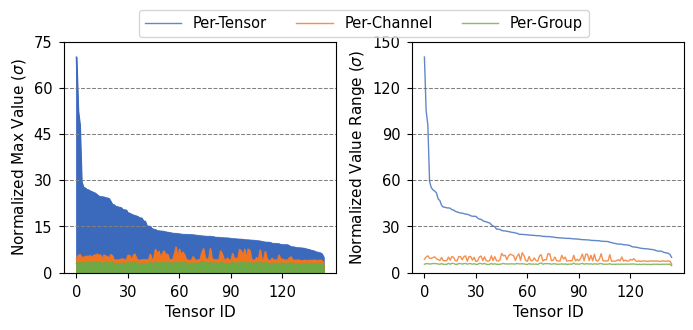

In [58]:
transparency = 0.6
title_loc = 1.4

tick_size    = 10.5
label_size   = 11
title_size   = 11
legend_size  = 10.5
text_size    = 10.5

f, ax_all = plt.subplots(1, 2)
fig_width     = 8
fig_height    = 3.
f.set_figwidth(fig_width)
f.set_figheight(fig_height)
f_list = []


j = 0
ax = ax_all[j]
for idx, label in enumerate(labels):
    x_value = np.arange(len(layer_name_outlier))
    y_value = np.array(outlier_config[idx])
    color   = COLOR_LIST_DEFAULT[idx]
    f1, = ax.plot(x_value, y_value, color=color, linewidth=1, alpha=0.8)
    f2  = ax.fill_between(x_value, y_value, where=(y_value >= 0), interpolate=True, color=color)
    f_list.append(f1)
    

y_max = max(tensor_outlier_config) + 5
ax.set_ylim(0, y_max)
ax.set_xticks(np.arange(0, len(layer_name_outlier), 30))
ax.set_yticks(np.arange(0., y_max+1, 15))
ax.tick_params(axis='both', which='major', labelsize=tick_size, pad=5)

ax.set_ylabel('Normalized Max Value ' + r'($\sigma$)', fontsize=label_size, labelpad=4)
ax.set_xlabel('Tensor ID', fontsize=label_size, labelpad=4)

#ax.set_title('ResNet34 (2nd Half Layers)', loc='center', y=title_loc, pad=-30, verticalalignment="top", fontsize=title_size,)
ax.grid(True, linestyle='dashed', axis='y', zorder=0, color='grey', linewidth=0.75)

#ax.text(0.7, 0.25, 'Prune 2 Bit Columns',  color='black', fontsize=text_size, weight='bold')



j = 1
ax = ax_all[j]
for idx, label in enumerate(labels):
    ax.plot(np.arange(len(layer_name_outlier)), range_config[idx], color=COLOR_LIST_DEFAULT[idx], 
             linewidth=1, alpha=0.8)

y_max = max(tensor_range_config) + 10
ax.set_ylim(0, y_max)
ax.set_xticks(np.arange(0, len(layer_name_outlier), 30))
ax.set_yticks(np.arange(0., y_max+1, 30))
ax.tick_params(axis='both', which='major', labelsize=tick_size, pad=5)

ax.set_ylabel('Normalized Value Range ' + r'($\sigma$)', fontsize=label_size, labelpad=4)
ax.set_xlabel('Tensor ID', fontsize=label_size, labelpad=4)

#ax.set_title('ResNet34 (2nd Half Layers)', loc='center', y=title_loc, pad=-30, verticalalignment="top", fontsize=title_size,)
ax.grid(True, linestyle='dashed', axis='y', zorder=0, color='grey', linewidth=0.75)

#ax.text(0.7, 0.25, 'Prune 2 Bit Columns',  color='black', fontsize=text_size, weight='bold')


legend_loc=[0.5, 1.01]
f.legend(f_list, labels, loc='upper center', bbox_to_anchor=legend_loc, 
         ncol=3, columnspacing=2, handlelength=2.5, fontsize=legend_size)
f.subplots_adjust(wspace=0.28, hspace=0.55)
#f.savefig('kl_div_comparison.svg', dpi=600, bbox_inches='tight')